# Linear Regression Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
ecommerce = pd.read_csv('Ecommerce Customers.csv')

In [5]:
ecommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


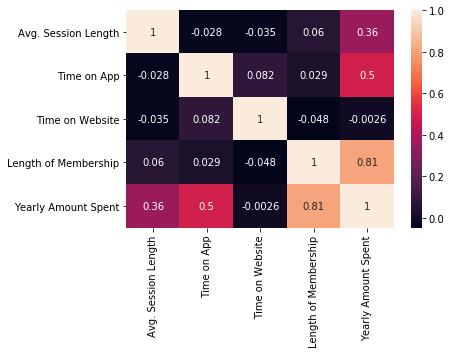

In [7]:
sns.heatmap(ecommerce.corr(), annot= True)

In [8]:
x = ecommerce[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y = ecommerce['Yearly Amount Spent']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=101)

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
coeff_app = pd.DataFrame(lm.coef_, x.columns, columns= ['Coefficient'])
coeff_app

,Coefficient
Avg. Session Length,25.701452
Time on App,37.955079
Length of Membership,61.599814


In [18]:
lm.intercept_

-1025.2433259949867

In [15]:
prediction_app = lm.predict(x_test)

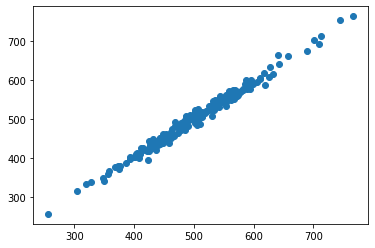

In [17]:
plt.scatter(y_test, prediction_app)

In [25]:
x2 = ecommerce[['Avg. Session Length', 'Time on Website', 'Length of Membership']]
y2 = ecommerce['Yearly Amount Spent']

In [27]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size = 0.4, random_state = 101)

In [30]:
lm.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lm.intercept_

-662.1141659727994

In [33]:
coeff_web = pd.DataFrame(lm.coef_,x2.columns,columns = ['Coefficient'])
coeff_web

,Coefficient
Avg. Session Length,22.963924
Time on Website,4.700215
Length of Membership,64.324589


In [37]:
prediction_web = lm.predict(x2_test)

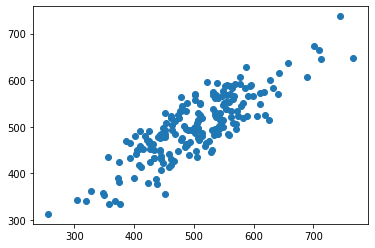

In [38]:
plt.scatter(y2_test,prediction_web)

In [36]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, prediction_app)

7.714142430963427

In [41]:
metrics.mean_squared_error(y_test, prediction_app)

93.79530581081748

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, prediction_app))

9.684797664939495

In [43]:
metrics.mean_absolute_error(y2_test, prediction_web)

36.17862041530807

In [44]:
metrics.mean_squared_error(y2_test, prediction_web)

1901.2589062210172

In [45]:
np.sqrt(metrics.mean_squared_error(y2_test, prediction_web))

43.60342768889869